In [17]:
# Install the WakaTime CLI
!pip install wakatime

In [18]:
!wakatime --file 'Logistic-Regression-From-Scratchipynb' --language 'Python' --write

Command line interface used by all WakaTime text editor plugins.

Usage:
  wakatime-cli [flags]

Flags:
      --ai-line-changes int                Optional number of lines added or removed by AI since  last heartbeat in the current file.
      --alternate-branch string            Optional alternate branch name. Auto-detected branch takes priority.
      --alternate-language string          Optional alternate language name. Auto-detected language takes priority.
      --alternate-project string           Optional alternate project name. Auto-detected project takes priority.
      --api-url string                     API base url used when sending heartbeats and fetching code stats. Defaults to https://api.wakatime.com/api/v1/.
      --category string                    Category of this heartbeat activity. Can be "coding", "ai coding", "building", "indexing", "debugging", "learning", "notes", "meeting", "planning", "researching", "communicating", "supporting", "advising", "running tests"

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### AI version of Logistic Regression From Scratch

--- Elastic Net Regularization Results (20 Features) ---
Final Regularized Cost: 0.1084
Model Accuracy on Test Set: 0.97

Learned Weights (First 2 Relevant): [4.77561413 4.24919915]
Noise Weights (Count of 18 features set to zero): 1/18


In [32]:
class LogisticRegressionFromScratch:
  # Constructure for the function
  def __init__(self, learning_rate = 0.01, iterations = 1000):
    self.lf = learning_rate
    self.iterations = iterations
    self.weights = None
    self.bias = 0
    self.const_history = []
  #implementing Sigmoid function from scratch
  def sigmoid (self,z):
    return 1 / ( 1 + np.exp(-z))
  # Implementing Cost function from scratch
  def cost (self, h,y):
    # m =  row of data set
    # y refers to the Actual Values (True Labels)
    # h refers to the Hypothesis/Predicted Probability
    m = len(y)
    return -(1/m)* np.sum(y*np.log(h) + (1 - y)*np.log(1 - h))
  # Model fitting section
  def fit(self , x, y ):
    """Train model using gradient descent"""
    # m number of colunm
    # n = number of row
    m, n = x.shape
    # np.dot () = matrix multiplication
    weights = np.zeros(n)
    for interation in range(self.iterations):
      # z=Xw+b
      z = np.dot (x,self.weights) + self.bias
      # sigmoid
      h = self.sigmoid(z)
      # Weight Gradient (dw)
      # x.T = x transpose
      dw = (1/m)*np.dot(x.T,(h-y))
      # Bias Gradient (db)
      db = (1/m)*np.sum(h-y)
      # Parameter Update
      # w (new) =  w (old) - α⋅dw
      self.weights = self.weights - self.lr.dw
      # b (new) = b (new) -  α⋅db
      self.bias = self.bais - self.lr.db
      # Record
      self.cost_history.append(self.cost(h, y))

    def predict(self,x):
      # Make prediction
      # Sigmoid(z)
      return (self.sigmoid(np.dot(x,self.weights) + self.bias) >= 0.5).astype(int)




###Standard Scaler

In [36]:
class StandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        # Avoid division by zero for constant features
        self.std_[self.std_ == 0] = 1
        return self

    # NEW METHOD: Implements the missing fit_transform functionality
    def fit_transform(self, X):
        """Fit to data, then transform it."""
        return self.fit(X).transform(X)

    def transform(self, X):
        return (X - self.mean_) / self.std_


Load and Prepare Data

We’ll generate a random dataset and standardize it:

Synthetic data: Points where x1 + x2 > 10 are labeled 1, otherwise 0.

Scaling: Standardizes features so gradient descent converges smoothly.

Here 80% data used for training and rest for testing.

In [37]:
# Generate a synthetic dataset
np.random.seed(42) # 42 ensuring each time you ran the given random number will be the same
x = np.random.rand(200, 2) * 10 # Random generate 200 rows and 2 columns
y = (x[:, 0] + x[:, 1] > 10).astype(int) # createa. result base on sum of 2 columns out of 20
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Scale the data for faster convergence
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# use the same parameter from the x_train to x_test
x_test = scaler.transform(x_test)

Train and Evaluate the model

In [39]:
model =  LogisticRegressionRegularized(learning_rate = 0.1, iterations = 1000) # initialize function
model.fit(x_train,y_train) # fit model
predictions = model.predict(x_test)
accuracy = np.mean(predictions == y_test) # Correct!
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


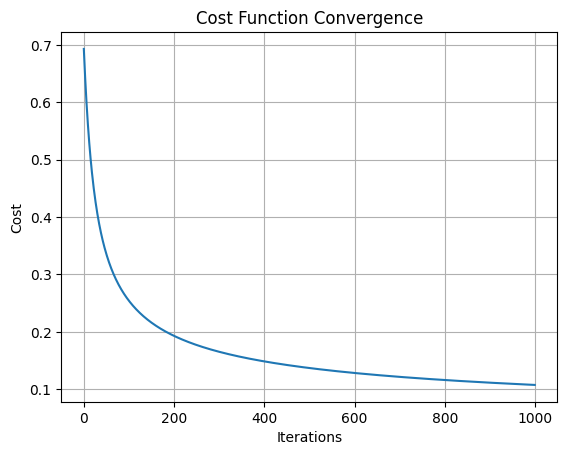

In [40]:
plt.plot(model.cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

###AI version of Logistic Regression From Scratch


In [41]:
import numpy as np
import math

class LogisticRegressionRegularized:
  """
  Logistic Regression Model with Elastic Net Regularization (L1 and L2).
  Uses Gradient Descent to optimize the weights.
  """
  def __init__(self, learning_rate=0.01, iterations=1000, lambda_l1=0.0, lambda_l2=0.0):
    # Core Parameters
    self.lr = learning_rate
    self.iterations = iterations
    self.weights = None
    self.bias = 0
    self.cost_history = []

    # Regularization Parameters
    self.lambda_l1 = lambda_l1 # L1 (Lasso) penalty strength
    self.lambda_l2 = lambda_l2 # L2 (Ridge) penalty strength

  def sigmoid (self, z):
    """Calculates the sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

  def cost (self, h, y):
    """Calculates the Binary Cross-Entropy Cost with Elastic Net Penalty."""
    m = len(y)
    # Clip probabilities to prevent log(0) errors (h must be > 0 and < 1)
    h = np.clip(h, 1e-15, 1 - 1e-15)

    # 1. Base Cross-Entropy Loss
    cross_entropy_loss = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    # 2. L1 Regularization Term (Lasso: |w|)
    l1_penalty = (self.lambda_l1 / m) * np.sum(np.abs(self.weights))

    # 3. L2 Regularization Term (Ridge: w^2)
    l2_penalty = (self.lambda_l2 / (2 * m)) * np.sum(self.weights**2)

    return cross_entropy_loss + l1_penalty + l2_penalty

  def fit(self, x, y):
    """Trains the model using Gradient Descent with Elastic Net."""
    m, n = x.shape

    # Initialize weights and bias
    self.weights = np.zeros(n)
    self.bias = 0
    self.cost_history = []

    for _ in range(self.iterations):
      # Forward Pass: z = Xw + b
      z = np.dot(x, self.weights) + self.bias
      h = self.sigmoid(z)

      # Gradient Calculation

      # 1. Unregularized Gradient (dCost/dw)
      dw_unreg = (1/m) * np.dot(x.T, (h - y))
      db = (1/m) * np.sum(h - y)

      # 2. Regularization Gradient Terms

      # L1 gradient: (lambda_l1 / m) * sgn(w) - drives weights to zero
      l1_gradient = (self.lambda_l1 / m) * np.sign(self.weights)

      # L2 gradient: (lambda_l2 / m) * w - shrinks weights toward zero
      l2_gradient = (self.lambda_l2 / m) * self.weights

      # 3. Combined Regularized Gradient
      dw_regularized = dw_unreg + l1_gradient + l2_gradient

      # Parameter Update
      self.weights = self.weights - self.lr * dw_regularized
      # Bias is generally not regularized
      self.bias = self.bias - self.lr * db

      # Record cost
      self.cost_history.append(self.cost(h, y))

    return self

  def predict(self, x):
    """Predicts binary classes (0 or 1)."""
    # Sigmoid(z)
    return (self.sigmoid(np.dot(x, self.weights) + self.bias) >= 0.5).astype(int)

# --- HELPER CLASS FOR SCALING (Manual StandardScaler) ---

class StandardScaler:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        # Avoid division by zero for constant features
        self.std_[self.std_ == 0] = 1
        return self
    def transform(self, X):
        return (X - self.mean_) / self.std_

# --- EXAMPLE USAGE TO TEST THE NEW CLASS ---

# 1. Setup Data (2 relevant features, 18 noise features)
np.random.seed(42)
X_relevant = np.random.rand(200, 2) * 10
X_noise = np.random.rand(200, 18) * 10
X_full = np.hstack((X_relevant, X_noise)) # 20 features total
# Target y depends ONLY on the first two features
y = (X_full[:, 0] + X_full[:, 1] > 10).astype(int)

# 2. Scale the data (essential for regularization to work fairly)
scaler = StandardScaler().fit(X_full)
X_scaled = scaler.transform(X_full)

# 3. Train-Test Split (simple manual split for demonstration)
train_size = 160
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Instantiate and Fit Model with Elastic Net (High L1, Low L2)
# L1 will drive the 18 noisy weights to zero, L2 will smooth the others.
model_en = LogisticRegressionRegularized(
    learning_rate = 0.5,
    iterations = 500,
    lambda_l1 = 0.5, # Strong L1 penalty (for feature selection)
    lambda_l2 = 0.01 # Small L2 penalty (for overall stability)
)
model_en.fit(X_train, y_train)

# 5. Predict and Evaluate
predictions = model_en.predict(X_test)
accuracy = np.mean(predictions == y_test)

print("--- Elastic Net Regularization Results (20 Features) ---")
print(f"Final Regularized Cost: {model_en.cost_history[-1]:.4f}")
print(f"Model Accuracy on Test Set: {accuracy:.2f}")

# Check the weights of the 18 noisy features
noise_weights = model_en.weights[2:]
zero_weights = np.sum(np.abs(noise_weights) < 1e-4)

print(f"\nLearned Weights (First 2 Relevant): {model_en.weights[:2]}")
print(f"Noise Weights (Count of 18 features set to zero): {zero_weights}/18")

--- Elastic Net Regularization Results (20 Features) ---
Final Regularized Cost: 0.1084
Model Accuracy on Test Set: 0.97

Learned Weights (First 2 Relevant): [4.77561413 4.24919915]
Noise Weights (Count of 18 features set to zero): 1/18
